#Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
! pip install -q kaggle

#Uploading Kaggle Json & Downloading Datasets

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dasanik2001","key":"821d40a45fb74fedc82df8c7d9682fd3"}'}

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download  sid321axn/covid-cxr-image-dataset-research
!unzip covid-cxr-image-dataset-research.zip

#Loading Datasets

In [ ]:
data=[]
labels=[]
Uninfected=os.listdir("/content/COVID_IEEE/normal")
for a in Uninfected:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("/content/COVID_IEEE/normal/"+a)
	gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(gray_image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

In [ ]:
Covid=os.listdir("/content/COVID_IEEE/covid")
for b in Covid:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("/content/COVID_IEEE/covid/"+b)
	gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(gray_image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)

#Resizing Data & Splitting Into Test and Train

In [ ]:
data = np.array(data)/255
labels = np.array(labels)

In [ ]:
labels.shape

(1204,)

In [ ]:
from sklearn.model_selection import train_test_split


# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20,random_state=43 )

In [ ]:
trainX.shape

(963, 224, 224, 3)

#Building & Compiling Model 

In [ ]:
# from tensorflow.keras.applications import ResNet
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
baseModel =InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
x= Conv2D(64, kernel_size=(3, 3),activation='relu')(baseModel.output)
x = Dropout(0.5)(x)

x = MaxPooling2D(pool_size=(3,3))(x)
x=(Dropout(0.25))(x)
x = Dense(1024, activation='relu')(x)
x = Flatten()(x)
final_output = Dense(1, activation='sigmoid', name='final_output')(x)
model_incp = Model(inputs=baseModel.input, outputs=final_output)
model_incp.compile(optimizer=RMSprop(lr=0.0001),loss='binary_crossentropy', metrics = ['accuracy'])
for layer in baseModel.layers:
	layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:

baseModel =VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
x= Conv2D(64, kernel_size=(3, 3),activation='relu')(baseModel.output)
x = Dropout(0.5)(x)

x = MaxPooling2D(pool_size=(3,3))(x)
x=(Dropout(0.25))(x)
x = Dense(1024, activation='relu')(x)
x = Flatten()(x)
final_output = Dense(1, activation='sigmoid', name='final_output')(x)
model_vgg16 = Model(inputs=baseModel.input, outputs=final_output)
model_vgg16.compile(optimizer=RMSprop(lr=0.0001),loss='binary_crossentropy', metrics = ['accuracy'])
for layer in baseModel.layers:
	layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
baseModel =VGG19(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
x= Conv2D(64, kernel_size=(3, 3),activation='relu')(baseModel.output)
x = Dropout(0.5)(x)

x = MaxPooling2D(pool_size=(3,3))(x)
x=(Dropout(0.25))(x)
x = Dense(1024, activation='relu')(x)
x = Flatten()(x)
final_output = Dense(1, activation='sigmoid', name='final_output')(x)
model_vgg19 = Model(inputs=baseModel.input, outputs=final_output)
model_vgg19.compile(optimizer=RMSprop(lr=0.0001),loss='binary_crossentropy', metrics = ['accuracy'])
for layer in baseModel.layers:
	layer.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
baseModel =Xception(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
x= Conv2D(64, kernel_size=(3, 3),activation='relu')(baseModel.output)
x = Dropout(0.5)(x)

x = MaxPooling2D(pool_size=(3,3))(x)
x=(Dropout(0.25))(x)
x = Dense(1024, activation='relu')(x)
x = Flatten()(x)
final_output = Dense(1, activation='sigmoid', name='final_output')(x)
model_xcp = Model(inputs=baseModel.input, outputs=final_output)
model_xcp.compile(optimizer=RMSprop(lr=0.0001),loss='binary_crossentropy', metrics = ['accuracy'])
for layer in baseModel.layers:
	layer.trainable = False

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

#Training the model

In [ ]:

H_incp=model_incp.fit(train_aug.flow(trainX, trainY, batch_size=32),
                    validation_data=(trainX,trainY),
                    validation_steps=len(trainX) / 32,
                    steps_per_epoch=len(trainX) / 32,
                    epochs=20)
 


Epoch 1/20
30/30 [==============================] - 46s 921ms/step - loss: 0.2645 - accuracy: 0.9024 - val_loss: 0.2354 - val_accuracy: 0.9055
Epoch 2/20
30/30 [==============================] - 24s 780ms/step - loss: 0.0677 - accuracy: 0.9720 - val_loss: 0.2108 - val_accuracy: 0.9283
Epoch 3/20
30/30 [==============================] - 24s 785ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.2544 - val_accuracy: 0.9148
Epoch 4/20
30/30 [==============================] - 24s 781ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.1407 - val_accuracy: 0.9491
Epoch 5/20
30/30 [==============================] - 24s 781ms/step - loss: 0.0837 - accuracy: 0.9834 - val_loss: 0.1305 - val_accuracy: 0.9439
Epoch 6/20
30/30 [==============================] - 23s 798ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0355 - val_accuracy: 0.9855
Epoch 7/20
30/30 [==============================] - 24s 786ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.2006 - val_accuracy: 0.9346

In [ ]:

H_vgg16=model_vgg16.fit(train_aug.flow(trainX, trainY, batch_size=32),
                    validation_data=(trainX,trainY),
                    validation_steps=len(trainX) / 32,
                    steps_per_epoch=len(trainX) / 32,
                    epochs=20)
 


Epoch 1/20
30/30 [==============================] - 51s 1s/step - loss: 0.7018 - accuracy: 0.5441 - val_loss: 0.6931 - val_accuracy: 0.5535
Epoch 2/20
30/30 [==============================] - 31s 1s/step - loss: 0.6001 - accuracy: 0.7259 - val_loss: 0.1934 - val_accuracy: 0.9688
Epoch 3/20
30/30 [==============================] - 31s 1s/step - loss: 0.2628 - accuracy: 0.9169 - val_loss: 0.1219 - val_accuracy: 0.9761
Epoch 4/20
30/30 [==============================] - 31s 1s/step - loss: 0.1664 - accuracy: 0.9502 - val_loss: 0.2148 - val_accuracy: 0.9252
Epoch 5/20
30/30 [==============================] - 31s 1s/step - loss: 0.2667 - accuracy: 0.9367 - val_loss: 0.0990 - val_accuracy: 0.9855
Epoch 6/20
30/30 [==============================] - 31s 1s/step - loss: 0.1555 - accuracy: 0.9553 - val_loss: 0.1382 - val_accuracy: 0.9564
Epoch 7/20
30/30 [==============================] - 31s 1s/step - loss: 0.1258 - accuracy: 0.9585 - val_loss: 0.0583 - val_accuracy: 0.9803
Epoch 8/20
30/30 [==

In [ ]:

H_vgg19=model_vgg19.fit(train_aug.flow(trainX, trainY, batch_size=32),
                    validation_data=(trainX,trainY),
                    validation_steps=len(trainX) / 32,
                    steps_per_epoch=len(trainX) / 32,
                    epochs=20)
 


Epoch 1/20
30/30 [==============================] - 41s 1s/step - loss: 0.7379 - accuracy: 0.6147 - val_loss: 0.5784 - val_accuracy: 0.8993
Epoch 2/20
30/30 [==============================] - 37s 1s/step - loss: 0.4065 - accuracy: 0.8245 - val_loss: 0.0897 - val_accuracy: 0.9657
Epoch 3/20
30/30 [==============================] - 37s 1s/step - loss: 0.3313 - accuracy: 0.8764 - val_loss: 0.2536 - val_accuracy: 0.9522
Epoch 4/20
30/30 [==============================] - 37s 1s/step - loss: 0.2378 - accuracy: 0.9138 - val_loss: 0.3066 - val_accuracy: 0.9543
Epoch 5/20
30/30 [==============================] - 37s 1s/step - loss: 0.2148 - accuracy: 0.9377 - val_loss: 0.0722 - val_accuracy: 0.9813
Epoch 6/20
30/30 [==============================] - 37s 1s/step - loss: 0.1934 - accuracy: 0.9304 - val_loss: 0.1390 - val_accuracy: 0.9678
Epoch 7/20
30/30 [==============================] - 36s 1s/step - loss: 0.1518 - accuracy: 0.9522 - val_loss: 0.2555 - val_accuracy: 0.9387
Epoch 8/20
30/30 [==

In [ ]:

H_xcp=model_xcp.fit(train_aug.flow(trainX, trainY, batch_size=32),
                    validation_data=(trainX,trainY),
                    validation_steps=len(trainX) / 32,
                    steps_per_epoch=len(trainX) / 32,
                    epochs=20)
 


Epoch 1/20
30/30 [==============================] - 62s 2s/step - loss: 0.2591 - accuracy: 0.8941 - val_loss: 0.2251 - val_accuracy: 0.8982
Epoch 2/20
30/30 [==============================] - 47s 2s/step - loss: 0.0607 - accuracy: 0.9792 - val_loss: 0.2173 - val_accuracy: 0.9117
Epoch 3/20
30/30 [==============================] - 47s 2s/step - loss: 0.0424 - accuracy: 0.9907 - val_loss: 0.2092 - val_accuracy: 0.9180
Epoch 4/20
30/30 [==============================] - 47s 2s/step - loss: 0.0286 - accuracy: 0.9948 - val_loss: 0.0206 - val_accuracy: 0.9917
Epoch 5/20
30/30 [==============================] - 47s 2s/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0517 - val_accuracy: 0.9813
Epoch 6/20
30/30 [==============================] - 47s 2s/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0137 - val_accuracy: 0.9958
Epoch 7/20
30/30 [==============================] - 47s 2s/step - loss: 0.0082 - accuracy: 0.9990 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 8/20
30/30 [==

#Saving Model to drive

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("final_model.h5")

#Model Summary

In [ ]:
model.summary()

#Testing Accuracy

In [ ]:
y_predict = model.predict(testX)

In [ ]:
y_predict

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

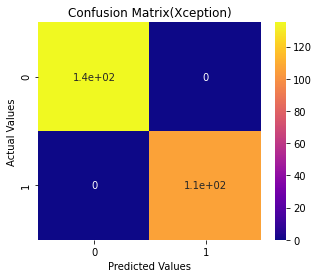

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(testY, y_labels_xcp)

plt.figure(figsize=(5,4))
sns.heatmap(cm,cmap='plasma',annot=True)
plt.title('Confusion Matrix(Xception)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
test_eval = model.evaluate(testX, testY, verbose=1)


8/8 [==============================] - 2s 206ms/step - loss: 1.0898 - accuracy: 0.5145


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 1.089847445487976
Test accuracy: 0.5145228505134583


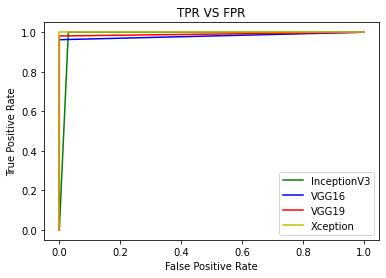

In [ ]:
from sklearn.metrics import roc_curve
y_predict_incp = model_incp.predict(testX)
y_labels_incp= [1 if y>=0.5 else 0 for y in y_predict_incp]
y_predict_vgg16 = model_vgg16.predict(testX)
y_labels_vgg16= [1 if y>=0.5 else 0 for y in y_predict_vgg16]
y_predict_vgg19 = model_vgg19.predict(testX)
y_labels_vgg19= [1 if y>=0.5 else 0 for y in y_predict_vgg19]
y_predict_xcp = model_xcp.predict(testX)
y_labels_xcp= [1 if y>=0.5 else 0 for y in y_predict_xcp]
fpr1, tpr1, thresholds1 = roc_curve(testY,y_labels_incp)
fpr2, tpr2, thresholds2 = roc_curve(testY,y_labels_vgg16)
fpr3, tpr3, thresholds3 = roc_curve(testY,y_labels_vgg19)
fpr4, tpr4, thresholds4 = roc_curve(testY,y_labels_xcp)


plt.plot(fpr1, tpr1, 'g', label='InceptionV3')
plt.plot(fpr2, tpr2, 'b', label='VGG16')
plt.plot(fpr3, tpr3, 'r', label='VGG19')
plt.plot(fpr4, tpr4, 'y', label='Xception')
plt.title('TPR VS FPR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


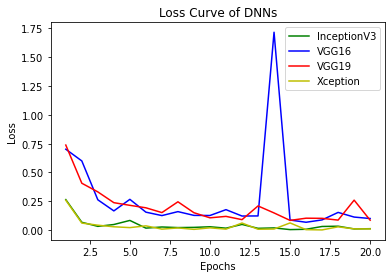

In [ ]:
loss_incp = H_incp.history['loss']
loss_vgg16= H_vgg16.history['loss']
loss_vgg19= H_vgg19.history['loss']
loss_xcp= H_xcp.history['loss']
epochs = range(1,21)
plt.plot(epochs, loss_incp, 'g', label='InceptionV3')
plt.plot(epochs, loss_vgg16, 'b', label='VGG16')
plt.plot(epochs, loss_vgg19, 'r', label='VGG19')
plt.plot(epochs, loss_xcp, 'y', label='Xception')
plt.title('Loss Curve of DNNs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



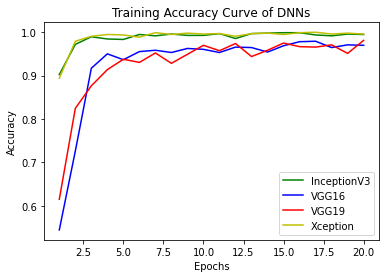

In [ ]:
acc_incp = H_incp.history['accuracy']
acc_vgg16= H_vgg16.history['accuracy']
acc_vgg19= H_vgg19.history['accuracy']
acc_xcp= H_xcp.history['accuracy']

epochs = range(1,21)
plt.plot(epochs, acc_incp, 'g', label='InceptionV3')
plt.plot(epochs, acc_vgg16, 'b', label='VGG16')
plt.plot(epochs, acc_vgg19, 'r', label='VGG19')
plt.plot(epochs, acc_xcp, 'y', label='Xception')

plt.title('Training Accuracy Curve of DNNs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
cm1 = confusion_matrix(testY, y_labels_incp)
cm2 = confusion_matrix(testY, y_labels_vgg16)
cm3 = confusion_matrix(testY, y_labels_vgg19)
cm4 = confusion_matrix(testY, y_labels_xcp)





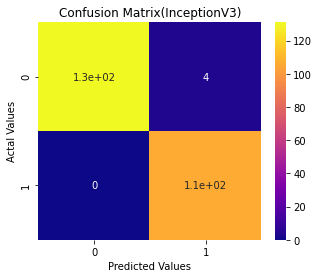

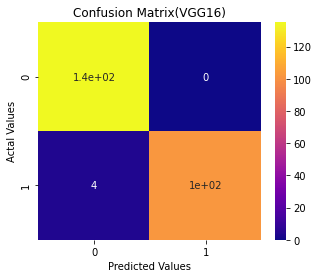

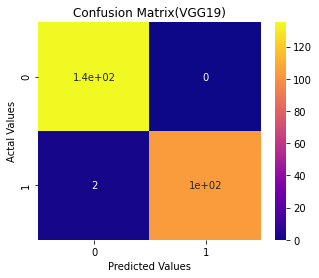

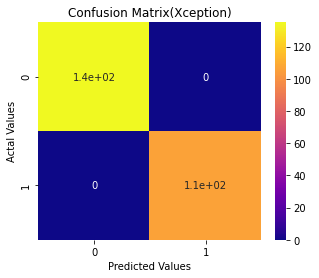

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm1,cmap='plasma',annot=True)
plt.title('Confusion Matrix(InceptionV3)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.figure(figsize=(5,4))
sns.heatmap(cm2,cmap='plasma',annot=True)
plt.title('Confusion Matrix(VGG16)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.figure(figsize=(5,4))
sns.heatmap(cm3,cmap='plasma',annot=True)
plt.title('Confusion Matrix(VGG19)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.figure(figsize=(5,4))
sns.heatmap(cm4,cmap='plasma',annot=True)
plt.title('Confusion Matrix(Xception)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
confusion_metrics(cm4)

True Positives: 106
True Negatives: 135
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
